Required Imports

In [39]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import (
    accuracy_score, roc_auc_score, precision_score,
    recall_score, f1_score, matthews_corrcoef, confusion_matrix
)

from xgboost import XGBClassifier

import matplotlib.pyplot as plt
import seaborn as sns
import joblib


Loading Dataset

In [41]:
df = pd.read_csv("/content/winequality-red.csv")
print("Shape:", df.shape)
df.head()


Shape: (1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [42]:
#Converting Target class to classification
df["target"] = (df["quality"] >= 7).astype(int)
df.drop("quality", axis=1, inplace=True)

df["target"].value_counts()

,count
target,
0,1382
1,217


Exploratory Data Analysis

In [43]:
df.shape, df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  target                1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


((1599, 12), None)

In [44]:
#Missing Data Check
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


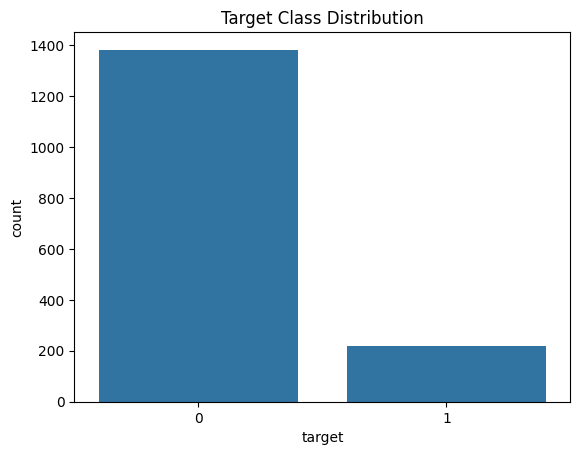

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="target", data=df)
plt.title("Target Class Distribution")
plt.show()

In [46]:
df.corr()["target"].sort_values()

,target
volatile acidity,-0.270712
density,-0.150460
total sulfur dioxide,-0.139517
chlorides,-0.097308
free sulfur dioxide,-0.071747
pH,-0.057283
residual sugar,0.047779
fixed acidity,0.120061
sulphates,0.199485
citric acid,0.214716


Data Preprocessing

In [47]:
X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(X_train.shape, X_test.shape)

(1279, 11) (320, 11)


Features Scaling

In [48]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Evaluation Function

In [33]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "AUC": roc_auc_score(y_test, y_prob),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1": f1_score(y_test, y_pred),
        "MCC": matthews_corrcoef(y_test, y_pred)
    }



LOGISTIC REGRESSION

In [51]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)

lr_metrics = evaluate_model(lr, X_test_scaled, y_test)
lr_metrics

{'Accuracy': 0.89375,
 'AUC': np.float64(0.880362689950466),
 'Precision': 0.6956521739130435,
 'Recall': 0.37209302325581395,
 'F1': 0.48484848484848486,
 'MCC': np.float64(0.4579720142879772)}

DECISION TREE

In [52]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

dt_metrics = evaluate_model(dt, X_test, y_test)
dt_metrics

{'Accuracy': 0.9,
 'AUC': np.float64(0.8047183275963394),
 'Precision': 0.6170212765957447,
 'Recall': 0.6744186046511628,
 'F1': 0.6444444444444445,
 'MCC': np.float64(0.5871815913211813)}

KNN

In [53]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

knn_metrics = evaluate_model(knn, X_test_scaled, y_test)
knn_metrics

{'Accuracy': 0.89375,
 'AUC': np.float64(0.8236504071866342),
 'Precision': 0.6666666666666666,
 'Recall': 0.4186046511627907,
 'F1': 0.5142857142857142,
 'MCC': np.float64(0.47377659786480564)}

NAIVE BAYES

In [54]:
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)

nb_metrics = evaluate_model(nb, X_test_scaled, y_test)
nb_metrics

{'Accuracy': 0.859375,
 'AUC': np.float64(0.8517336915456301),
 'Precision': 0.484375,
 'Recall': 0.7209302325581395,
 'F1': 0.5794392523364486,
 'MCC': np.float64(0.513114059557938)}

RANDOM FOREST

In [55]:
rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)
rf.fit(X_train, y_train)

rf_metrics = evaluate_model(rf, X_test, y_test)
rf_metrics

{'Accuracy': 0.94375,
 'AUC': np.float64(0.9518512299555033),
 'Precision': 0.9310344827586207,
 'Recall': 0.627906976744186,
 'F1': 0.75,
 'MCC': np.float64(0.7373965484007285)}

XG BOOST

In [56]:
xgb = XGBClassifier(
    eval_metric="logloss",
    random_state=42
)
xgb.fit(X_train, y_train)

xgb_metrics = evaluate_model(xgb, X_test, y_test)
xgb_metrics

{'Accuracy': 0.940625,
 'AUC': np.float64(0.9421543111409622),
 'Precision': 0.875,
 'Recall': 0.6511627906976745,
 'F1': 0.7466666666666667,
 'MCC': np.float64(0.723857334019234)}

Comparision

In [57]:
results = pd.DataFrame(
    [lr_metrics, dt_metrics, knn_metrics, nb_metrics, rf_metrics, xgb_metrics],
    index=[
        "Logistic Regression",
        "Decision Tree",
        "KNN",
        "Naive Bayes",
        "Random Forest",
        "XGBoost"
    ]
)

results

,Accuracy,AUC,Precision,Recall,F1,MCC
Logistic Regression,0.893750,0.880363,0.695652,0.372093,0.484848,0.457972
Decision Tree,0.900000,0.804718,0.617021,0.674419,0.644444,0.587182
KNN,0.893750,0.823650,0.666667,0.418605,0.514286,0.473777
Naive Bayes,0.859375,0.851734,0.484375,0.720930,0.579439,0.513114
Random Forest,0.943750,0.951851,0.931034,0.627907,0.750000,0.737397
XGBoost,0.940625,0.942154,0.875000,0.651163,0.746667,0.723857


MODEL FILES

In [58]:
joblib.dump(lr, "logistic_model.pkl")
joblib.dump(dt, "decision_tree_model.pkl")
joblib.dump(knn, "knn_model.pkl")
joblib.dump(nb, "naive_bayes_model.pkl")
joblib.dump(rf, "random_forest_model.pkl")
joblib.dump(xgb, "xgboost_model.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [60]:
#Generating test data for web upload
test_df = X_test.copy()
test_df["target"] = y_test.values
test_df.to_csv("wine_test_data.csv", index=False)
